<a href="https://colab.research.google.com/github/namoshi/ml_intro/blob/master/xgboost_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## XGBoost example

In [1]:
import xgboost as xgb
import pandas as pd  
from sklearn.datasets import load_iris  
from sklearn.model_selection import train_test_split  


In [2]:
# Iris Data
iris = load_iris()  

iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)  
iris_target = pd.Series(iris.target)  

train_x, test_x, train_y, test_y = train_test_split(iris_data, iris_target, test_size=0.2, shuffle=True)  
dtrain = xgb.DMatrix(train_x, label=train_y)  

In [11]:
# Training
param = {'max_depth': 2, 'eta': 1, 'objective': 'multi:softmax', 'num_class': 3}

num_round = 10  
bst = xgb.train(param, dtrain, num_round) 

dtest = xgb.DMatrix(test_x)  
pred = bst.predict(dtest)

print(test_y)
print(pred)

46     0
148    2
116    2
8      0
18     0
96     1
12     0
50     1
84     1
64     1
77     1
103    2
3      0
102    2
47     0
19     0
97     1
118    2
145    2
79     1
135    2
37     0
56     1
58     1
91     1
49     0
136    2
86     1
13     0
76     1
dtype: int64
[0. 2. 2. 0. 0. 1. 0. 1. 1. 1. 2. 2. 0. 2. 0. 0. 1. 2. 2. 1. 2. 0. 1. 1.
 1. 0. 2. 1. 0. 1.]


In [4]:
# Eval the trained model

from sklearn.metrics import accuracy_score  

score = accuracy_score(test_y, pred)  
print('score:{0:.4f}'.format(score))  

score:0.9667


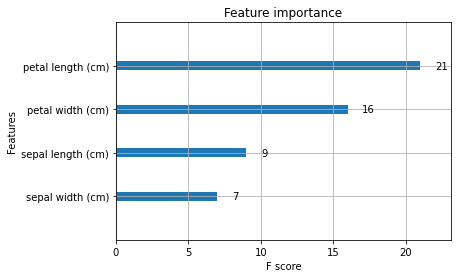

In [5]:
xgb.plot_importance(bst) 

## 学習中のValidation

In [6]:
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.2, shuffle=True)
dtrain = xgb.DMatrix(train_x, label=train_y)  
dvalid = xgb.DMatrix(valid_x, label=valid_y) 

In [7]:
# Training the model

param = {'max_depth': 2, 'eta': 0.5, 'objective': 'multi:softmax', 'num_class': 3, 'eval_metric': 'mlogloss'}

evallist = [(dvalid, 'eval'), (dtrain, 'train')]  
num_round = 10000  
bst = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds=5) 

[0]	eval-mlogloss:0.569206	train-mlogloss:0.575072
Multiple eval metrics have been passed: 'train-mlogloss' will be used for early stopping.

Will train until train-mlogloss hasn't improved in 5 rounds.
[1]	eval-mlogloss:0.330971	train-mlogloss:0.361973
[2]	eval-mlogloss:0.217159	train-mlogloss:0.24197
[3]	eval-mlogloss:0.145346	train-mlogloss:0.172299
[4]	eval-mlogloss:0.103552	train-mlogloss:0.130782
[5]	eval-mlogloss:0.082237	train-mlogloss:0.100879
[6]	eval-mlogloss:0.067013	train-mlogloss:0.082648
[7]	eval-mlogloss:0.058213	train-mlogloss:0.068428
[8]	eval-mlogloss:0.051012	train-mlogloss:0.058558
[9]	eval-mlogloss:0.046819	train-mlogloss:0.051691
[10]	eval-mlogloss:0.045566	train-mlogloss:0.047729
[11]	eval-mlogloss:0.0447	train-mlogloss:0.044066
[12]	eval-mlogloss:0.043971	train-mlogloss:0.041399
[13]	eval-mlogloss:0.043659	train-mlogloss:0.039589
[14]	eval-mlogloss:0.042466	train-mlogloss:0.03787
[15]	eval-mlogloss:0.044634	train-mlogloss:0.035981
[16]	eval-mlogloss:0.045964	tr

In [8]:
print('Best Score:{0:.4f}, Iteratin:{1:d}, Ntree_Limit:{2:d}'.format(  
     bst.best_score, bst.best_iteration, bst.best_ntree_limit))  

Best Score:0.0180, Iteratin:1192, Ntree_Limit:1193


In [9]:
# Evaluate the trained model

dtest = xgb.DMatrix(test_x)  
pred = ypred = bst.predict(dtest, ntree_limit=bst.best_ntree_limit) 

score = accuracy_score(test_y, pred)  
print('score:{0:.4f}'.format(score))  

score:0.9667
